<div style="border:solid green 3px; padding: 20px">
																					
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что добавляешь краткое описание задачи. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
#импортируем библиотеки
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# прочитаем файл
try:
    data = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    data  = pd.read_csv('real_estate_data.csv',sep='\t')

In [5]:
#узнаем сколько строк и столбцов в данных
old = data.shape[0]
old

23699

In [6]:
#посмотрим на данные

pd.set_option('display.max_columns', None)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


 <div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Обрати внимание, что часть столбцов заменилась на "...". Чтобы это исправить, нужно увеличить максимальное количество отображающихся столбцов командой
			
	pd.set_option('display.max_columns', None)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Исправлено 🙂
</div>

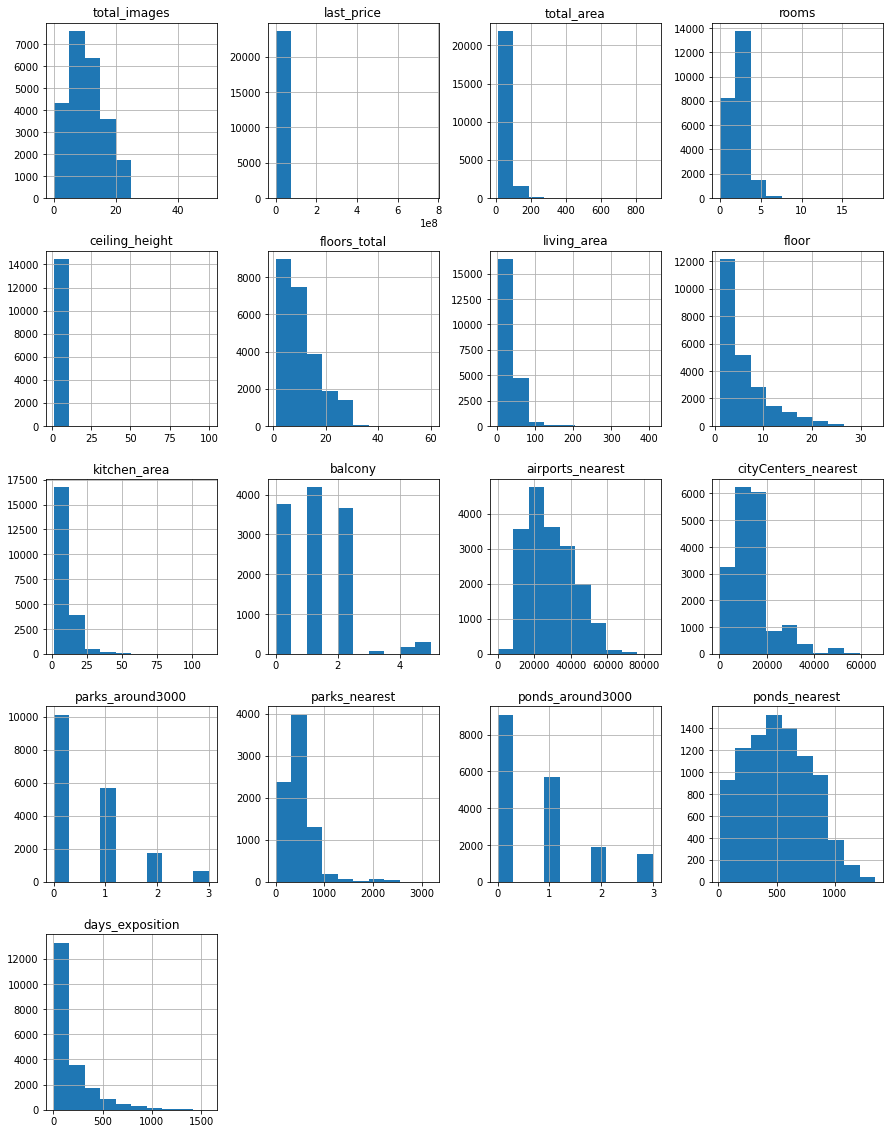

In [21]:
# построим гистограмму
data.hist(figsize=(15, 20));




<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Графики построено верно! 
</div>
															
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если после кода вызывающего график добавить ";", то мы избавимся от строчки над графиком)

	data.hist(figsize=(15, 20));
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Исправлено 🙂
</div>

In [6]:
#посмотрим какие типы данных есть в дф
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [8]:
# подсчёт пропусков в данных
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


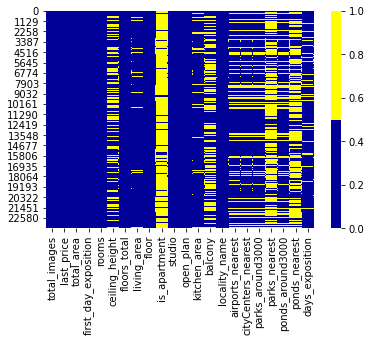

In [22]:
# визуализация пропущенных значений с помощью тепловой карты

# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data.isnull(), cmap=sns.color_palette(colours));

In [23]:
data.describe.T()

AttributeError: 'function' object has no attribute 'T'

Смущает максимальное значение у столбца ceiling_height. Потолок 100 м, похоже на выброс. Разберемся позже.

 ##  Итоги по шагу 1:

Будем работать с датасетом из 22699 строк и 22 столбцов.

Столбцы ceiing_height, is_apartment, balcony, parks_nearest, ponds_nearest имеют больше всего пропусков. Необходимо разобраться с пропусками и заполнить их по возможности.

Также для корректной работы с данными нужно изменить тип данных: first_day_exposition преобразуем в дату, floors_total, balcony, parks_around3000 и ponds_around3000 в целочисленный тип, is_apartment - в логический.

Дубликатов(явных) в данных нет.

Изменим название столбцов согласно "змеиному" стилю


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Всё верно! Если тебе так будет удобнее, то можно создать универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики поочередно применяя методы head, describe, info, duplicated и т.п.
</div>

# Шаг 2. Выполните предобработку данных

In [11]:
#переименуем столбцы
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                            'parks_around3000': 'parks_around_3000', 
                            'ponds_around3000': 'ponds_around_3000'})

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец! Так датафрейм будет более аккуратным
</div>

In [12]:
# считаем процент пропусков
for col in data.columns:
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

total_images - 0%
last_price - 0%
total_area - 0%
first_day_exposition - 0%
rooms - 0%
ceiling_height - 39%
floors_total - 0%
living_area - 8%
floor - 0%
is_apartment - 88%
studio - 0%
open_plan - 0%
kitchen_area - 10%
balcony - 49%
locality_name - 0%
airports_nearest - 23%
city_centers_nearest - 23%
parks_around_3000 - 23%
parks_nearest - 66%
ponds_around_3000 - 23%
ponds_nearest - 62%
days_exposition - 13%


Видим, какой  процент от общего количества составляют пропуски. 

Больше всего пропусков(88%) в столбце is_apartment. Будем считать, что продавец по умолчанию его оставляет пустым и не ставит отметку "нет", вместо пропуска вставим False.

parks_nearest - 66% и ponds_nearest - 62%: парки и озера поблизости.Вероятно, эта информация не была получена автоматически из сервисов на основе картографических данных. Оставим эти пропуски, также оставим и airports_nearest и cityCenters_nearest, ponds_around3000 и parks_around3000.

ceiling_height - заменим пропуски медианой, но поработаем с данными,так как ранее замечено что высота потолка была 100м, что не кажется реалистичным.

floors_total - заменим пропуски медианой.

locality_name - категориальная переменная, поставим 'missing' вместо пропусков




balcony

Приступим к заполнению пропусков. Для столбца с балконами считаем, что если продавец не указал число балконов, то, скорее всего, в его квартире их нет. заменим пустые значения на 0 и приведем к типу int

In [13]:
#с помощью fillna заменим пропуски на 0 и убедимся, что пропусков нет
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int64')
data['balcony'].isna().sum()

0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

is_apartment

In [14]:
#аналогичное проделаем для столбца is_apartment. Если продавец не поставил "да", значит это не апартаменты
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()


0

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👌
</div>

first_day_exposition

In [15]:
#изменим тип у first_day_exposition
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#затрудняюсь чем-либо заменить тут пропуски

floors_total

In [16]:
#Теперь поработаем с столбцом floors_total
# заполним пропускм медианой
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'] = data['floors_total'].astype('int')
data['floors_total'].isna().sum()

0

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если мы заполняем таким способом, то нужно делать проверку, а не превышает ли этаж, на котором квартира общую этажность? Можно заменить на этаж квартиры либо оставить как есть
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Тут не понимаю, что исправить, я заполняю медианой пропуски как раз в столбце "всего этажей"🙂
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v2:</b> 
<br>По результатам заполнения может получиться так, что ты заполнишь пропуск медианой, а этаж, на котором расположена квартира будет больше медианы
</div>

ceiling_height

In [17]:
# поработаем с данными в столбце ceiling_height
print(data['ceiling_height'].sort_values(ascending=False).head(20))

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
Name: ceiling_height, dtype: float64


В данных присутствуют аномалии: потолок 100м, 25, 27.. Делаем предположение, что пропущена точка и имелось в виду 2.7 вместо 27

In [18]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10
data['ceiling_height'].describe()

count    14504.000000
mean         2.729608
std          0.319850
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         14.000000
Name: ceiling_height, dtype: float64

In [19]:
# заполним пропуски в высоте потолков медианой
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен с таким решением для столбца с высотой потолков, так как основная часть данных в этом столбце находится в небольшом диапазоне.
</div>

In [20]:
"""СП 54.13330.2016 «СНиП 31-01-2003 Здания жилые многоквартирные». 
В своде правил установлено,что в многоквартирных домах в центральной части России потолок должен быть не ниже 2,5 м
предлагаю убрать плохие данные (с высотой потолка менее 2.5м). Также ограничим максимальную высоту - 7 м""" 

data = data.query('ceiling_height>=2.5&ceiling_height<=7')
data['ceiling_height'].describe()

count    23616.000000
mean         2.697966
std          0.220465
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Исправлено замечание к высоте потолка. Смотрим потолки от 2.5 м до 7м включительно🙂
</div>

locality_name

In [21]:
# в категориальной переменной locality_name заменим пропуски на missing
data['locality_name'] = data['locality_name'].fillna('missing')
data['locality_name'].isna().sum()

0

kitchen_area , living_area

Возможно, это  лишнее , но попробую сделать) Площадь кв = площадь нежилых помещений + площадь жилых.
Грубо говоря, total_area = kitchen_area + living_area
Заменю пропуски в kitchen_area  и living_area, зная эту формулу. Конечно, это с погрешностями.. ведь у нас нет площади других нежилых


data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area']-data['living_area'])
data['living_area'] = data['living_area'].fillna(data['total_area']-data['kitchen_area'])

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Это не совсем правильный способ замены  пропусков, так как в нежилую площадь входит не только кухня, но и коридоры, кладовки и санузел. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Пропущу этот пункт. Заполнять пропуски таким образом не будем🙂
</div>

In [22]:
#проверим тип данных
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000              float64
parks_nearest                  float64
ponds_around_3000              float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [23]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1897
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5510
city_centers_nearest     5487
parks_around_3000        5486
parks_nearest           15568
ponds_around_3000        5486
ponds_nearest           14532
days_exposition          3170
dtype: int64

In [24]:
data['locality_name'].value_counts()

Санкт-Петербург                        15680
посёлок Мурино                           522
посёлок Шушары                           440
Всеволожск                               397
Пушкин                                   366
                                       ...  
поселок городского типа Кондратьево        1
деревня Большая Пустомержа                 1
посёлок Сапёрное                           1
поселок станции Лужайка                    1
посёлок Высокоключевой                     1
Name: locality_name, Length: 364, dtype: int64

Приведем все в нижний регистр и заменим 'поселок', 'поселок городского типа','городской поселок' на 'поселок'

In [25]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок', 'поселок городского типа','городской поселок'], 'поселок', regex=True)) 
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].value_counts()
#data['locality_name'].unique()

санкт-петербург                      15680
поселок мурино                         556
поселок шушары                         440
всеволожск                             397
пушкин                                 366
                                     ...  
деревня борисова грива                   1
поселок дружноселье                      1
деревня пчева                            1
поселок дзержинского                     1
садовое товарищество приладожский        1
Name: locality_name, Length: 322, dtype: int64

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Супер! Здесь всё верно)
</div>

## Итоги по шагу 2 

На этом шаге я заменила пропуски, где это было возможно и изменила типы данных.
Для заполнения пропусков я использовала: медиану, булевы значения и 'missing' для категориальной переменной.
Весьма высокий процент пропусков для столбцов, которые грузятся из геосервисов, необходимо пересмотреть процесс выгрузки, чтобы иметь более полный датасет. "мусор на входе = мусор на выходе"

Почистили неявные дубли среди названий населенных пунктов. (Около 40 штук)

# Шаг 3. Добавьте в таблицу новые столбцы 

цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);

In [26]:
data['last_price'].describe()

count    2.361600e+04
mean     6.550512e+06
std      1.090419e+07
min      1.219000e+04
25%      3.430000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [27]:
# жилье с ценой менее 10 000 и более 100 000 000 выглядит как аномалия. отбросим их
data = data.query('last_price>100000&last_price<100000000')
data['last_price'].describe()

count    2.357800e+04
mean     6.259729e+06
std      6.432784e+06
min      4.300000e+05
25%      3.420000e+06
50%      4.650000e+06
75%      6.778750e+06
max      9.900000e+07
Name: last_price, dtype: float64

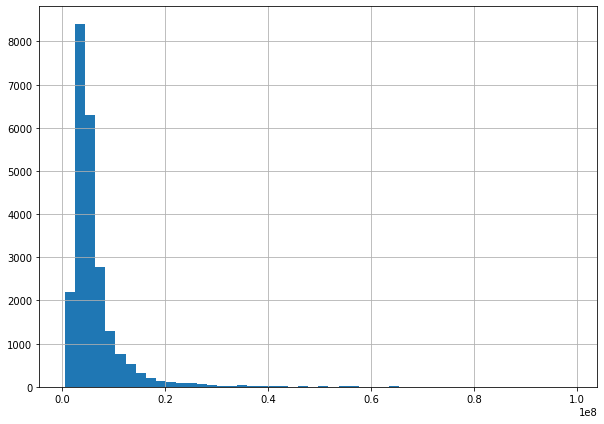

In [28]:
data['last_price'].hist(bins=50,figsize=(10,7));

In [29]:
# для округления с используем round()
data['unit_price'] = round(data['last_price']/data['total_area'],2)
data['unit_price'].describe()

count     23578.000000
mean      98618.650114
std       42918.199995
min        7962.960000
25%       76651.262500
50%       95000.000000
75%      114130.430000
max      848484.850000
Name: unit_price, dtype: float64

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [30]:
# День недели
data['day_exposition'] = data['first_day_exposition'].dt.weekday
data['day_exposition'].value_counts().sort_values()

6    1686
5    1929
0    3590
2    3952
4    3982
1    4164
3    4275
Name: day_exposition, dtype: int64

Чаще всего объявления выкладывают по четвергам и понедельникам, а меньше всего в субботу и воскресенье

год публикации объявления;


In [31]:
#Год
data['year_exposition'] = data['first_day_exposition'].dt.year
data['year_exposition'].value_counts().sort_values()

2014     137
2015    1183
2016    2766
2019    2866
2017    8149
2018    8477
Name: year_exposition, dtype: int64

С каждым годом продают всё больше и больше недвижимости...

месяц публикации объявления;

In [32]:
#Месяц
data['month_exposition'] = data['first_day_exposition'].dt.month
data['month_exposition'].value_counts().sort_values()

5     1266
1     1493
12    1634
7     1687
8     1733
6     1752
9     1972
10    2115
11    2360
4     2363
3     2574
2     2629
Name: month_exposition, dtype: int64

Конец зимы -начало весны -- наиболее популярный период для публикации объявлений. Меньше всего объявлений в мае и январе(но и рабочих дней в эти месяцы тоже обычно меньше)

Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [33]:
# создадим функцию для определения типа этажа квартиры, параметр функции - строка датафрейма
def floor_group(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        if row['floor'] == row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        pass
    

In [34]:
#применим функцию для нового столбца 'floor_type'
data['floor_type'] = data.apply(floor_group, axis=1) 

<AxesSubplot:>

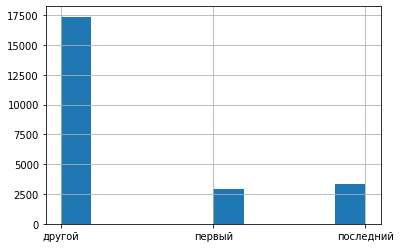

In [35]:
data['floor_type'].hist()

Меньше всего предложений недвижимости на первом и последних этажах.

Расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [36]:
# поделим столбец city_centers_nearest на 1000 для перевода из м в км
#для округления используем round()
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
data['city_centers_nearest_km'].describe()

count    18092.000000
mean        14.202023
std          8.613616
min          0.000000
25%          9.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

In [37]:
# проверим, что вышло
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,unit_price,day_exposition,year_exposition,month_exposition,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,2019,3,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,2018,12,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,2015,8,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,2015,7,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,2018,6,другой,8.0


## Итоги по шагу 3

В датасет мы добавили новые столбцы:

* unit_price - цена одного квадратного метра;

* day_exposition - день недели публикации объявления;

* month_exposition - месяц публикации объявления;

* year_exposition - год публикации объявления;

* floor_type- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

* расстояние до центра города в километрах.


Согласно данным из новых столбцов: средняя цена за квадратный метр около 99 496 руб, медианная цена - 95 000 руб. Чаще всего объявления выкладывают по четвергам и понедельникам, а меньше всего в субботу и воскресенье. Конец зимы -начало весны -- наиболее популярный период для публикации объявлений. Меньше всего объявлений в мае и январе(но и рабочих дней в эти месяцы тоже обычно меньше). С каждым годом предложений на рынке жилья больше и больше. Меньше всего предложений недвижимости на первом и последних этажах. Средняя удаленность от центра составляет 14.82 км, медианная - 13 км.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

# Шаг 4. Проведите исследовательский анализ данных

Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.

Список параметров:

общая площадь;

жилая площадь;

площадь кухни;

цена объекта;

количество комнат;

высота потолков;

тип этажа квартиры («первый», «последний», «другой»);

общее количество этажей в доме;

расстояние до центра города в метрах;

расстояние до ближайшего парка

Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

In [38]:
# вспомню названия столбцов
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition', 'unit_price', 'day_exposition',
       'year_exposition', 'month_exposition', 'floor_type',
       'city_centers_nearest_km'],
      dtype='object')

In [39]:
cols = ['total_area','living_area','kitchen_area','last_price','rooms','floor_type','floors_total','city_centers_nearest','parks_nearest']

In [40]:
for col in cols:
    print(data[col].describe())
    

count    23578.000000
mean        59.966168
std         33.510930
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        590.000000
Name: total_area, dtype: float64
count    21686.000000
mean        34.267787
std         21.200216
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.000000
Name: living_area, dtype: float64
count    21315.000000
mean        10.534746
std          5.748753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        107.000000
Name: kitchen_area, dtype: float64
count    2.357800e+04
mean     6.259729e+06
std      6.432784e+06
min      4.300000e+05
25%      3.420000e+06
50%      4.650000e+06
75%      6.778750e+06
max      9.900000e+07
Name: last_price, dtype: float64
count    23578.000000
mean         2.066036
std          1.070374
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max    

total_area- общая площадь;

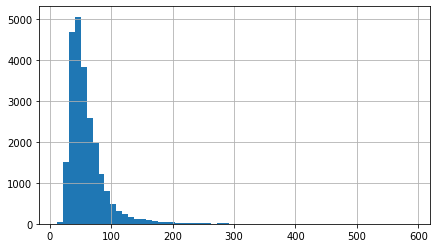

In [41]:
data['total_area'].hist(bins=60,figsize=(7,4));

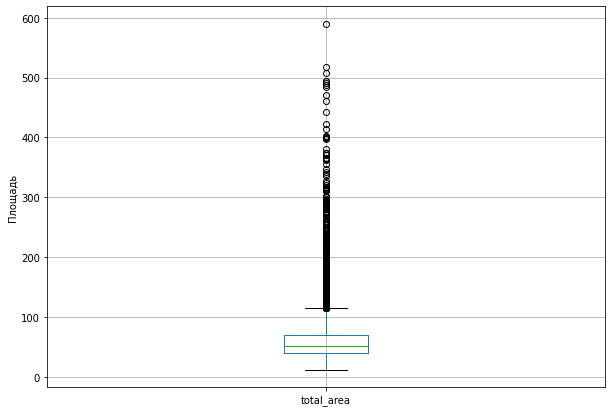

Диаграмма "ящик с усами"


In [42]:
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь')
plt.show()
print('Диаграмма "ящик с усами"')

 В размах «усов» попадают нормальные значения, а за пределами находятся выбросы.
 
 Самая маленькая площадь продаваемой недвижимости - 12 квадратов, самая большая - 900 квадратов. Средняя площадь недвижимости 60.39, а медианная - 52 квадрата. Из гистограммы следует, что большинство объектов имеют площадь более 20 кв метров и до 105 кв метров. Посмотрим гистограмму с данными в этом диапазаоне

In [43]:
# вот столько  строк отсекаем , приемлемо (90% датасета на месте)
len(data.query('total_area<20|total_area>105')) 

1601

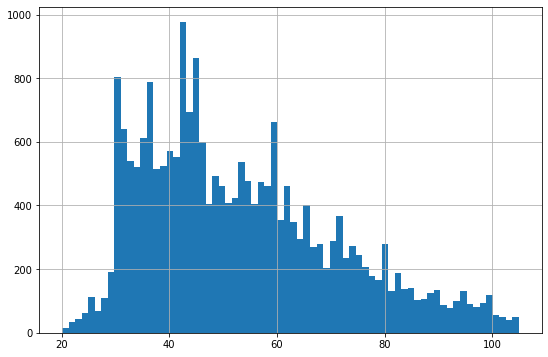

In [44]:
data = data.query('total_area>20&total_area<105')
data.query('total_area>20&total_area<105')['total_area'].hist(bins=70,figsize=(9,6));

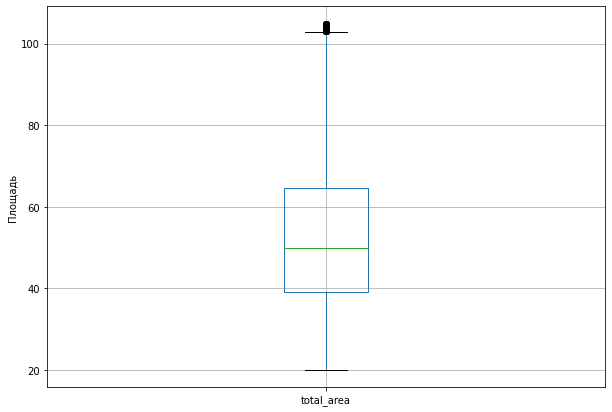

Диаграмма "ящик с усами"


In [45]:
data.query('total_area>20&total_area<105').boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь')
plt.show()
print('Диаграмма "ящик с усами"')

living_area - жилая площадь

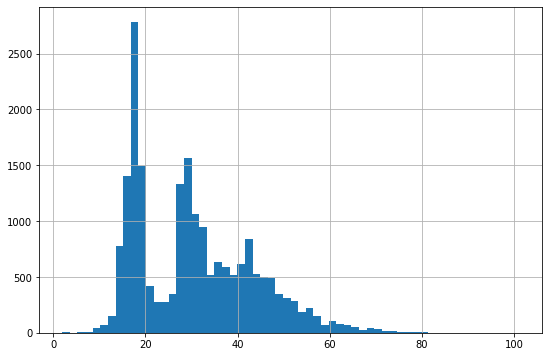

In [46]:
# аналогичное проделаем для жилой площади - living_area
data['living_area'].hist(bins=60,figsize=(9,6));

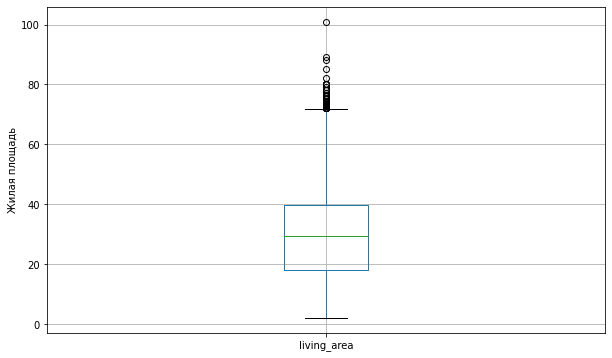

Диаграмма "ящик с усами"


In [47]:
data.boxplot(column=['living_area'], figsize=(10,6), grid=True)
plt.ylabel('Жилая площадь')
plt.show()
print('Диаграмма "ящик с усами"')

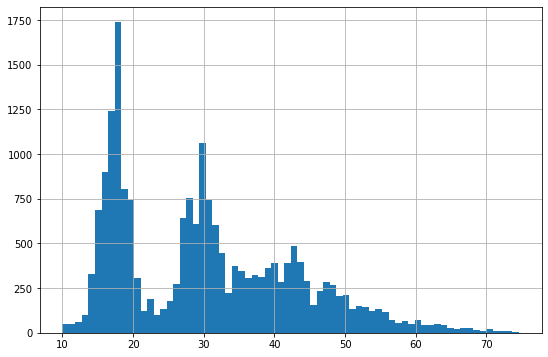

In [48]:
# уберем объекты с жилой площадью до 10 и от 75
data.query('living_area>=10&living_area<75')['living_area'].hist(bins=70,figsize=(9,6));

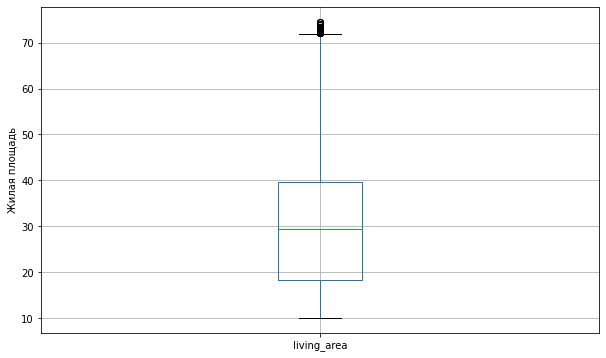

Диаграмма "ящик с усами"


In [49]:
data.query('living_area>=10&living_area<75').boxplot(column=['living_area'], figsize=(10,6), grid=True)
plt.ylabel('Жилая площадь')
plt.show()
print('Диаграмма "ящик с усами"')

kitchen_area - площадь кухни в квадратных метрах 

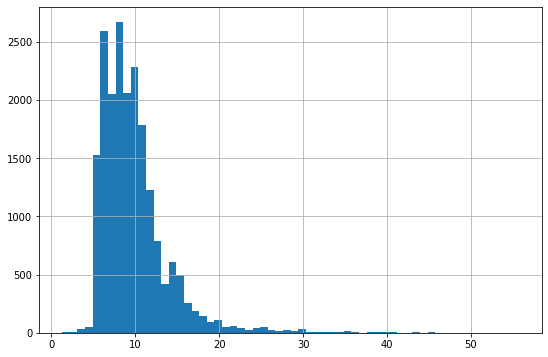

In [50]:
# аналогичное проделаем для кухни -
data['kitchen_area'].hist(bins=60,figsize=(9,6));

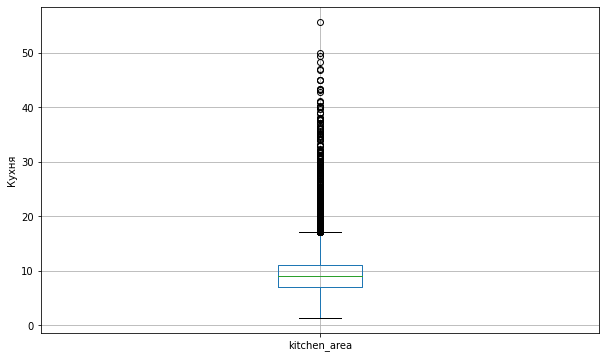

Диаграмма "ящик с усами"


In [51]:
data.boxplot(column=['kitchen_area'], figsize=(10,6), grid=True)
plt.ylabel('Кухня')
plt.show()
print('Диаграмма "ящик с усами"')

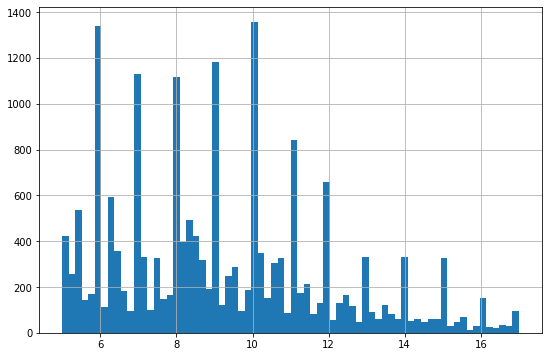

In [52]:
# уберем объекты с площадью до 5 и от 17
data.query('kitchen_area>=5&kitchen_area<=17')['kitchen_area'].hist(bins=70,figsize=(9,6));

Пики возникают возле целых значений. Вероятно редко кухню замеряют точно, берут примерное или округленное значение

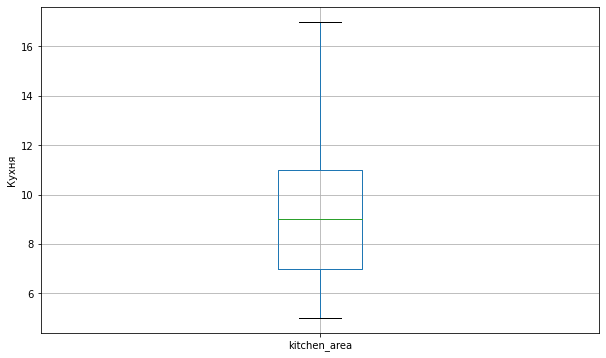

Диаграмма "ящик с усами"


In [53]:

data.query('kitchen_area>=5&kitchen_area<=17').boxplot(column=['kitchen_area'], figsize=(10,6), grid=True)
plt.ylabel('Кухня')
plt.show()
print('Диаграмма "ящик с усами"')

last_price - цена на момент снятия с публикации

(надоело рисовать боксплоты, дальше только гистограммы, созданные с помощью matplotlib.pyplot)

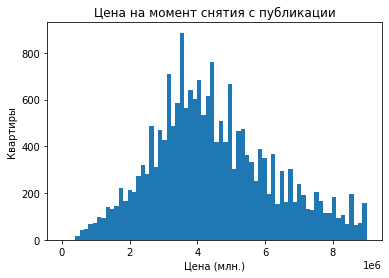

In [54]:
plt.hist(data['last_price'], bins=70, range=(1e+04,9e+06))
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Цена (млн.)')
plt.ylabel('Квартиры')
plt.show()

 Чаще всего цена недвижимости в диапазоне от 3.7 до 4.2 млн рублей

rooms - количество комнат;

In [55]:
# смотрю какие значения есть в столбце
data['rooms'].value_counts()

1    7989
2    7828
3    5230
4     653
0     186
5      51
6       5
7       1
Name: rooms, dtype: int64

In [56]:
# многокомнатных квартир не так много, ограничим от 0 до 6
data = data.query('rooms<7')

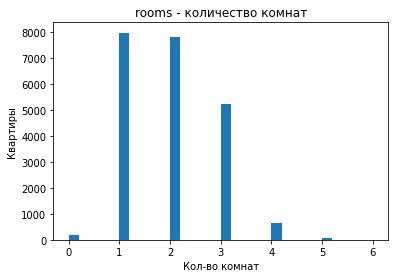

In [57]:
plt.hist(data['rooms'], bins=30, range=(0,6))
plt.title('rooms - количество комнат')
plt.xlabel('Кол-во комнат')
plt.ylabel('Квартиры')
plt.show()

Видим, что есть 0 комнат, возможно, под этим подразумевалась квартира-студия. Больше всего однокомнатных и двухкомнатных квартир. Также наблюдаем что  с ростом комнат предложений меньше.

ceiling_height - высота потолков;


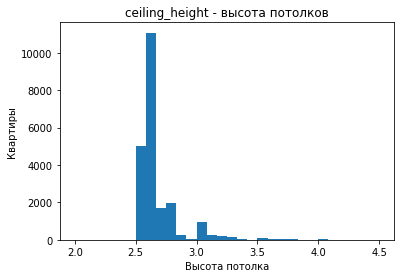

In [58]:
plt.hist(data['ceiling_height'], bins=30, range=(2,4.5))
plt.title('ceiling_height - высота потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Квартиры')
plt.show()

Чаше всего продается жилье с высотой потолка 2.65м. Потолки выше трех метров встречаются редко

floor_type - тип этажа квартиры («первый», «последний», «другой»);

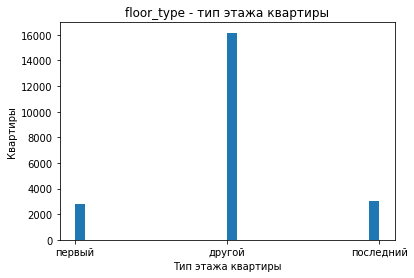

In [59]:
plt.hist(data['floor_type' ], bins=30)
plt.title('floor_type - тип этажа квартиры')
plt.xlabel('Тип этажа квартиры')
plt.ylabel('Квартиры')
plt.show()

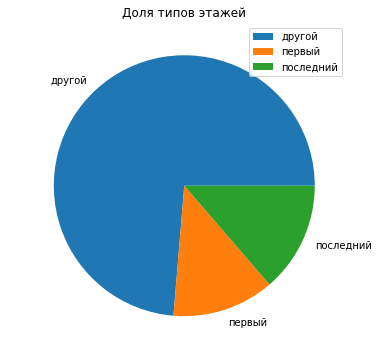

In [60]:
#Нагляднее будет  использовать тут пирог-диаграмму
# в сводной таблице сгруппируем данные по типу этажа, посчитаем сколько этажей каждого типа
data.pivot_table(index='floor_type',values='rooms',aggfunc='count') \
  .plot.pie(y='rooms',label=' ', title='Доля типов этажей',figsize=(9,6))

plt.show()

Реже всего публикуются объявления с жильем на 1-ом и последнем этажах

floors_total - всего этажей в доме

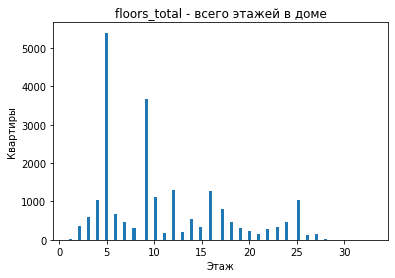

In [61]:
plt.hist(data['floors_total'], bins=100, range=(1,33))
plt.title('floors_total - всего этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Квартиры')
plt.show()

Больше всего предложений в пятиэтажках (в принципе неудивительно для спб, ведь там нельзя строить высотки)и в девятиэтажках

сity_centers_nearest - расстояние до центра города

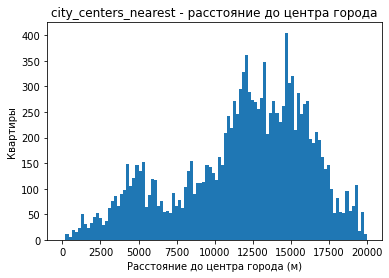

In [62]:
plt.hist(data['city_centers_nearest'], bins=100, range=(0,20000))
plt.title('city_centers_nearest - расстояние до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.ylabel('Квартиры')
plt.show()

Наблюдаем рост предложений при удалености 5000 м от центра, большинство же предложений в диапазоне 12000<x<15000

parks_nearest -расстояние до ближайшего парка (м)

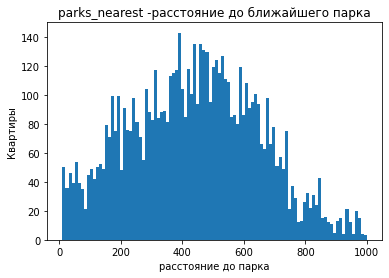

In [63]:
plt.hist(data['parks_nearest'], bins=100, range=(10,1000))
plt.title('parks_nearest -расстояние до ближайшего парка')
plt.xlabel('расстояние до парка')
plt.ylabel('Квартиры')
plt.show()

Большинство квартир рядом с парками (400-700м)! Или парков чересчур много..

Типичное объявление на сервисе недвижимости это однокомнатная или двухкомнатная квартира с средней площадью 52 кв метра и высотой потолка 2.65 м в пятиэтажном или девятиэтажном доме. Площадь кухни 7-12 метров, жилая площадь 18-42. Рядом с квартирой есть парк в пешей доступности.

In [64]:
# проверю, что мы не выбросили лишнего  из датафрейма, максимум 10%
new = data.shape[0]
new/old*100


92.58618507110005

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! 
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>У тебя остались квартиры с потолками по 14 метров, что очень много даже для двухуровневой квартиры. Я бы ограничил высоту потолка 6-7 метрами. Также  давай изучим аномалии в других столбцах. Посмотри какие значения есть в столбцах со стоимостью квартиры, количеством комнат и общей площадью. Кажется, в них есть значения, которые сильно выделяются на общем фоне. Не забудь проверить какое количество данных мы в итоге отбрасываем. Это количество не должно превышать 10% от изначального объёма данных. C этим может помочь следующий код

	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Убрала аномалии в столбце высота потолков, оставила потолки от 2,5м до 7м
    
 В столбце rooms оставила жилье, у которого не более 7 комнат
    
 В столбце total_area оставляю квартиры от 20 до 105 кв метров
    
 Убедилась, что выкидываем допустимое количество  данных (не более 10%)🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Теперь всё верно)
</div>

Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [65]:
data['days_exposition'].describe()

count    19166.000000
mean       173.591308
std        211.810856
min          1.000000
25%         44.000000
50%         92.000000
75%        219.000000
max       1580.000000
Name: days_exposition, dtype: float64

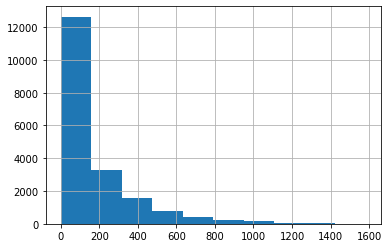

In [66]:
#Постройте гистограмму.
data['days_exposition'].hist();

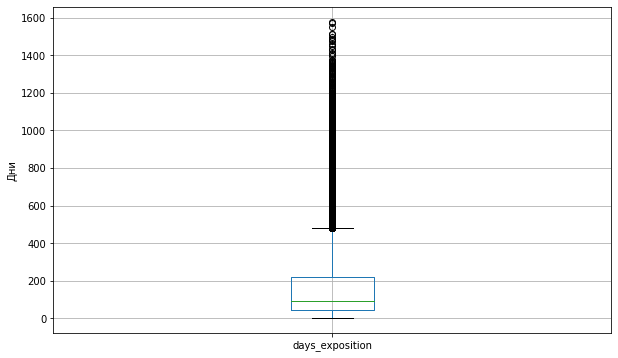

Диаграмма "ящик с усами"


In [67]:
data.boxplot(column=['days_exposition'], figsize=(10,6), grid=True)
plt.ylabel('Дни')
plt.show()
print('Диаграмма "ящик с усами"')

In [68]:
#Посчитайте среднее и медиану.
print('Среднее:',round(data['days_exposition'].mean(),3))
print('Медиана:',data['days_exposition'].median())

Среднее: 173.591
Медиана: 92.0


В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

Самая быстрая продажа - 1 день. Самая долгая - 1580 дней (больше 4-х лет)

Нормальным сроком для продажи является промежуток 45 - 232 дней. Ориентируемся на боксплот и квартили.

Быстрая продажа : 0-45 дней

Долгая продажа: от 232 дней



Среднее время продажи - 181 день, в то время как медиана почти в два раза меньше - 95 дней. Лучше ориентироваться на медиану (менее чувствительна к выбросам), среднее сильно искажено и может не отражать реальную картину.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

Опеделите факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Изучите, зависит ли цена от:

общей площади;

жилой площади;

площади кухни;

количества комнат;

этажа, на котором расположена квартира (первый, последний, другой);

даты размещения (день недели, месяц, год).


Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

In [69]:
#строим матрицу корреляции
print(data[['last_price','total_area','living_area','kitchen_area','rooms','floor_type']].corr()) 

              last_price  total_area  living_area  kitchen_area     rooms
last_price      1.000000    0.663090     0.529570      0.508257  0.370042
total_area      0.663090    1.000000     0.900636      0.448709  0.789033
living_area     0.529570    0.900636     1.000000      0.137347  0.884168
kitchen_area    0.508257    0.448709     0.137347      1.000000  0.039304
rooms           0.370042    0.789033     0.884168      0.039304  1.000000


<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Рассчитывать корреляцию Пирсона для дня недели, месяца и года продажи не эффективно, так как цена в данном случае зависит от них не линейно, ведь это категориальные переменные. Чтобы изучить зависимость для этих параметров лучше построить bar plot или гистограмму рассчитав среднее значение или медиану. Графики у тебя уже есть, поэтому остаётся только удалить расчет корреляции)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Исправлено🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Правка выполнена 👍
</div>

(использую шкалу Чеддока)
Заметная положительная корреляция у столбцов: 

цена и общая площадь(0.65),

цена и жилая площадь(0.57).

Умеренная положительная корреляция у столбцов: 

цена и кол-во комнат(0.36);

цена и площадь кухни(0.49).



In [70]:
#все-таки для удобства работы с данными создам сводную табличку
df = data.pivot_table(index='last_price', values = ['total_area','living_area','kitchen_area','rooms','floor_type','day_exposition','month_exposition','year_exposition'])

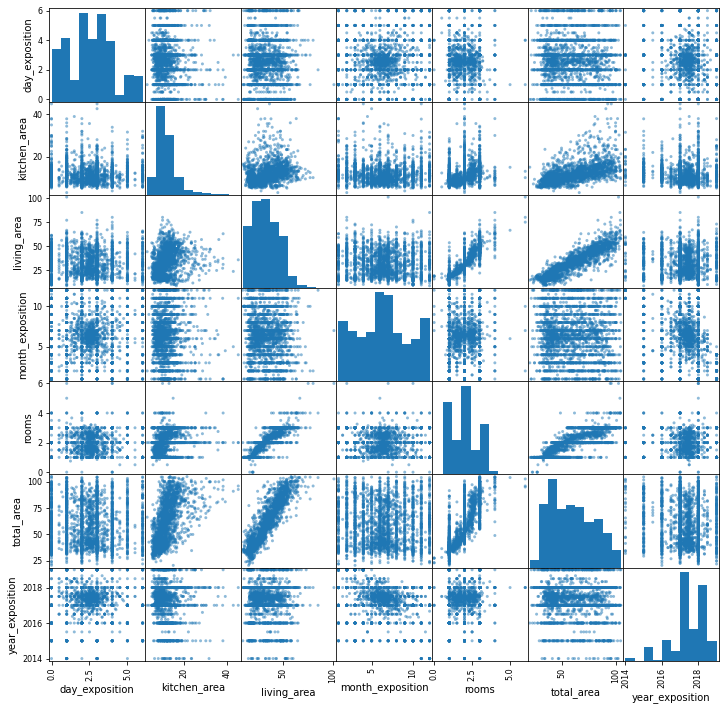

In [71]:
#Построим диаграмму рассеяния попарно для всех величин методом scatter_matrix()
pd.plotting.scatter_matrix(df , figsize=(12, 12));

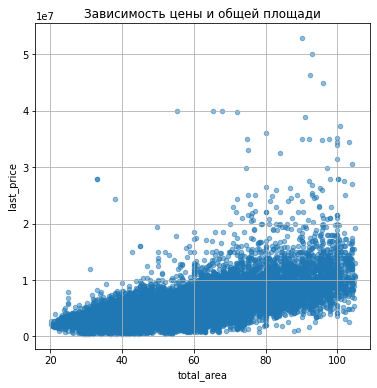

In [72]:
data.plot(y='last_price', x='total_area', kind='scatter', alpha=0.5, figsize=(6,6), grid=True)
plt.title('Зависимость цены и общей площади');

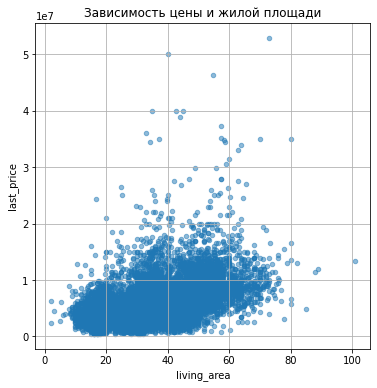

In [73]:
data.plot(y='last_price', x='living_area', kind='scatter', alpha=0.5, figsize=(6,6), grid=True) 
plt.title('Зависимость цены и жилой площади');

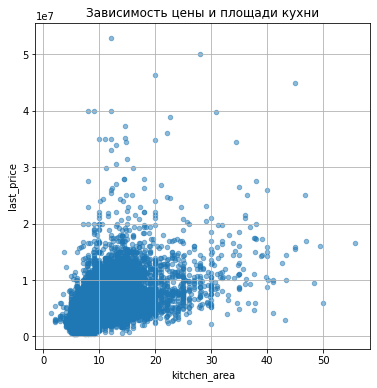

In [74]:
data.plot(y='last_price', x='kitchen_area', kind='scatter', alpha=0.5, figsize=(6,6), grid=True) 
plt.title('Зависимость цены и площади кухни');

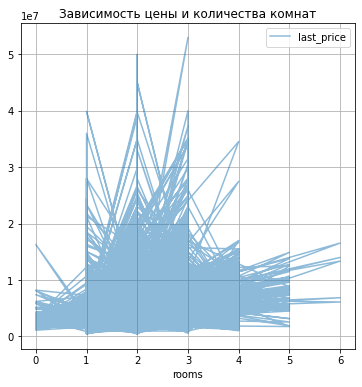

In [75]:
data.plot(y='last_price', x='rooms', alpha=0.5, figsize=(6,6), grid=True) 
plt.title('Зависимость цены и количества комнат');
#острое нечто

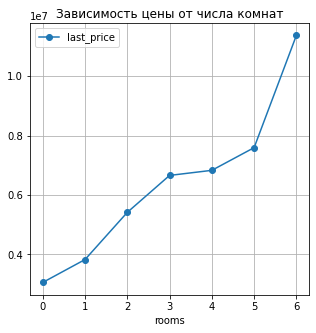

In [76]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от числа комнат')
plt.show()

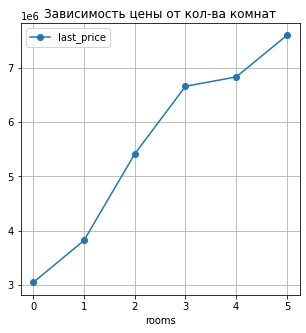

In [77]:
# ограничимся квартирами в которых 1-5 комнат
data.query('rooms<6').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены от кол-ва комнат')
plt.show()

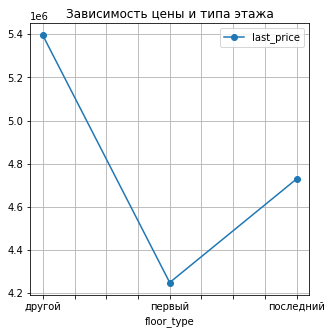

In [78]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены и типа этажа')
plt.show()

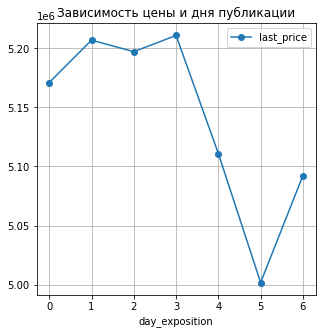

In [79]:
data.pivot_table(index='day_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены и дня публикации')
plt.show()

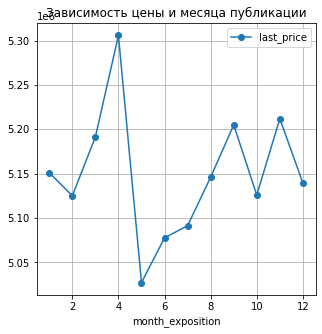

In [80]:
data.pivot_table(index='month_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены и месяца публикации')
plt.show()

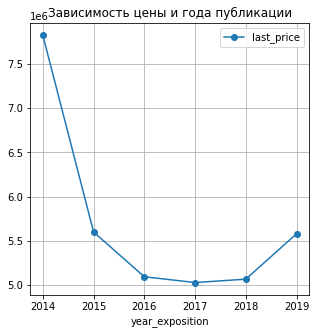

In [81]:
data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.title('Зависимость цены и года публикации')
plt.show()

Выводы:
    
    Из графиков и по матрице корреляции видим, что основным фактором, влияющими на цену, является площадь квартиры. Увеличение комнат также приводит к росту цены недвижимости, ведь чем больше комнат тем больше площадь. Самыми дешевыми  считаются квартиры на первом этаже. Из графика 'Зависимость цены и дня публикации' узнаем, что в субботу чаще выкладывают дорогие квартиры, а в воскресенье - дешевые.  По году размещения объявлений наблюдаем плавное снижение цены до 2018 года, затем снова рост цен. 

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

                   count
locality_name           
санкт-петербург    14152
поселок мурино       555
поселок шушары       432
всеволожск           392
пушкин               337
колпино              334
поселок парголово    324
гатчина              302
деревня кудрово      296
выборг               222


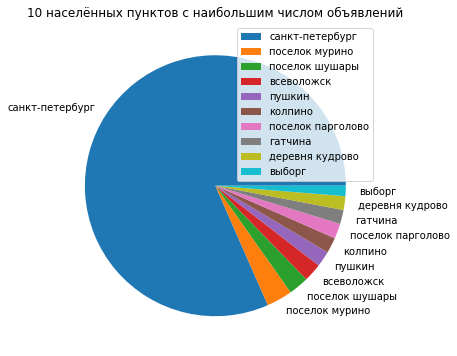

In [82]:
#строю сводную табл/ индекс -населенный пункт. запишем ее в переменную popular
popular = data.pivot_table(index='locality_name', values='last_price', aggfunc='count')
# переименую столбец
popular.columns=['count']
popular = popular.sort_values(by='count',ascending= False).head(10)
# выведем 10 пунктов с наибольшим кол-вом объявлений
print(popular.sort_values(by='count',ascending= False).head(10))
# используем диаграмму- пирог для наглядности
popular.sort_values(by='count',ascending= False).head(10).plot.pie(y='count',label=' ', title='10 населённых пунктов с наибольшим числом объявлений',figsize=(9,6))
plt.show()

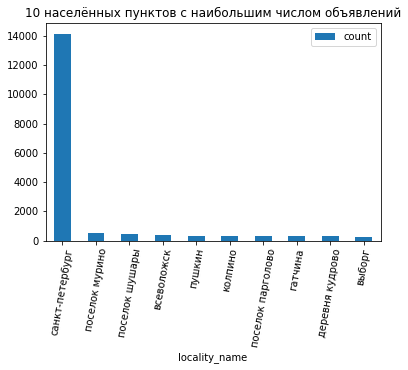

In [83]:
ax = popular.plot.bar( y='count', rot=80)
ax.set_title('10 населённых пунктов с наибольшим числом объявлений');

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Для визуализации лучше использовать барплот, так как на нем лучше видна разница между группами с близкими значениями. Ну и интереснее будет посмотреть на график для средней цены
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Добавлен график барплот 🙂
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Отлично! Хорошо бы ещё добавить график по средней цене, а не по количеству объявлений
</div>

In [84]:
popular['mean_area_price'] = data.pivot_table(index='locality_name', values='unit_price', aggfunc='mean')
popular.sort_values(by='mean_area_price',ascending=False)

,count,mean_area_price
locality_name,,
санкт-петербург,14152,110105.705493
пушкин,337,101336.668576
деревня кудрово,296,92400.999459
поселок парголово,324,90447.638241
поселок мурино,555,85678.486468
поселок шушары,432,78726.074676
колпино,334,75443.324162
гатчина,302,69012.654603
всеволожск,392,68754.876454


In [85]:
print('Самая высокая цена за квадратный метр',popular.loc[popular['mean_area_price']==popular['mean_area_price'].max()])
print('Самая низкая цена за квадратный метр',popular.loc[popular['mean_area_price']==popular['mean_area_price'].min()])

Самая высокая цена за квадратный метр                  count  mean_area_price
locality_name                          
санкт-петербург  14152    110105.705493
Самая низкая цена за квадратный метр                count  mean_area_price
locality_name                        
выборг           222     58381.508649


Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [86]:
# запишем квартиры спб в переменную spb
spb = data.query('locality_name=="санкт-петербург"')
spb['city_centers_nearest_km'].describe()



count    14106.000000
mean        12.090458
std          4.641051
min          0.000000
25%          9.000000
50%         13.000000
75%         15.000000
max         29.000000
Name: city_centers_nearest_km, dtype: float64

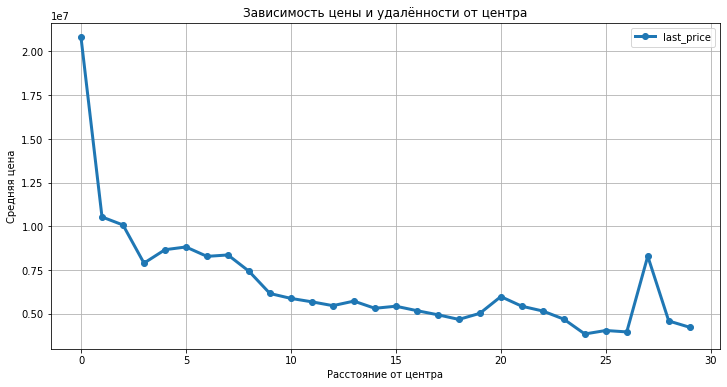

In [87]:
spb.pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='mean').plot(figsize=(12,6), style='o-',grid=True, linewidth=3, title='Зависимость цены и удалённости от центра')
plt.xlabel('Расстояние от центра')
plt.ylabel('Средняя цена')
plt.show()

Цена на жилье уменьшается с отдаленностью от центра. Так заметное снижение цен идет для квартир, которые удалены от центра более чем на 7 км

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Отличный анализ 👍
</div>

# Шаг 5. Напишите общий вывод


В результате работы были проанализированы данные о недвижимости в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Я провела исследовательский анализ данных и установила параметры, влияющие на цену объектов. 

Для начала я ознакомилась с данными: сколько строк и столбцов, какие типы данных есть, сколько пропусков.

Затем я обработала данные для дальнейшего анализа по ним: часть столбцов я переименовала согласно змеиному стилю, также изменила тип данных согласно  данным содержащихся в них, постаралась заполнить пропуски в данных способами изученными в теории. 

Причины пропусков:

поля необязательны к заполнению - пользователь не захотел вводить,

пользователь намеренно скрыл информацию,

пользователь не знает реальных значений и не заполнил,

сбои технического характера (выгрузка из других систем прошла неудачно),

конвертация файлов, изменение кодировки файла().

В ходе работы я построила множество графиков и гистрограмм, убрали/исправили аномальные значения. 

Так я оставила потолки от 2.65 от 7 м, квартиры с общей площадью от 20 до 105 кв метров и с ценой от 100 000 до 100 000 000 руб

От первичного датасета осталось примерно 92,59% данных, что является нормой для анализа.

В датасет для дальнейшего анализа я добавила новые столбцы:

* unit_price - цена одного квадратного метра;

* day_exposition - день недели публикации объявления;

* month_exposition - месяц публикации объявления;

* year_exposition - год публикации объявления;

* floor_type- тип этажа квартиры (значения — «‎первый», «последний», «другой»);

* расстояние до центра города в километрах.

В результате работы с данными выяснилось, что типичное объявление на сервисе недвижимости это однокомнатная или двухкомнатная квартира с средней площадью 52 кв метра и высотой потолка 2.65 м в пятиэтажном или девятиэтажном доме. Квартира находится не на первом и не на последнем этаже.Площадь кухни 7-12 метров, жилая площадь 18-42. Рядом с квартирой есть парк в пешей доступности.

К факторам, которые больше всего влияют на цену квартиры можно отнести: площадь квартиры и количество комнат. 

Нормальным сроком для продажи является промежуток 45 - 232 дней.
Быстрая продажа : 0-45 дней
Долгая продажа: от 232 дней
Среднее время продажи - 181 день, в то время как медиана почти в два раза меньше - 95 дней. Лучше ориентироваться на медиану (менее чувствительна к выбросам), среднее сильно искажено и может не отражать реальную картину.

Среди локаций с наибольшим количеством объявлений самая высокая цена заквадатный метр в Питере, а наименьшая - в Выборге.

Также из графика получили, что в пределах 7 км удаленности от центра квартиры самые дорогие. При большей удаленности цена идет на спад.





<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- отбросить аномальные значения 
<br>- удалить расчет корреляции для времени продажи

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>


<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.